## Return Periods
Return Periods are located in the \input\*MyProject*\returnPeriods directory. They are provided as CSV files with the following format:

    - The first row of the CSV file contains the column names.
    - The first column should be named "time_yr" and contains time in number of years as an integer.
    - The other columns should contain the expected number of events. The column names correspond to the return period names and must match the names used in the network.xlsx file.
    - Multiple CSV files can be provided in the same directory, allowing users to describe return periods with different time ranges and step sizes.
    - By default a polynomial interpolation is used for the return periods.

Return periods are stored in the network object under the network.returnPeriods attribute.

Network for study case <1-HV-urban--0-sw> initialized.

Simulation:	Start =   1; Stop =  51; Duration =  50 timesteps.
Hazard:		Start =   3; Stop =   8; Duration =   5 timesteps.


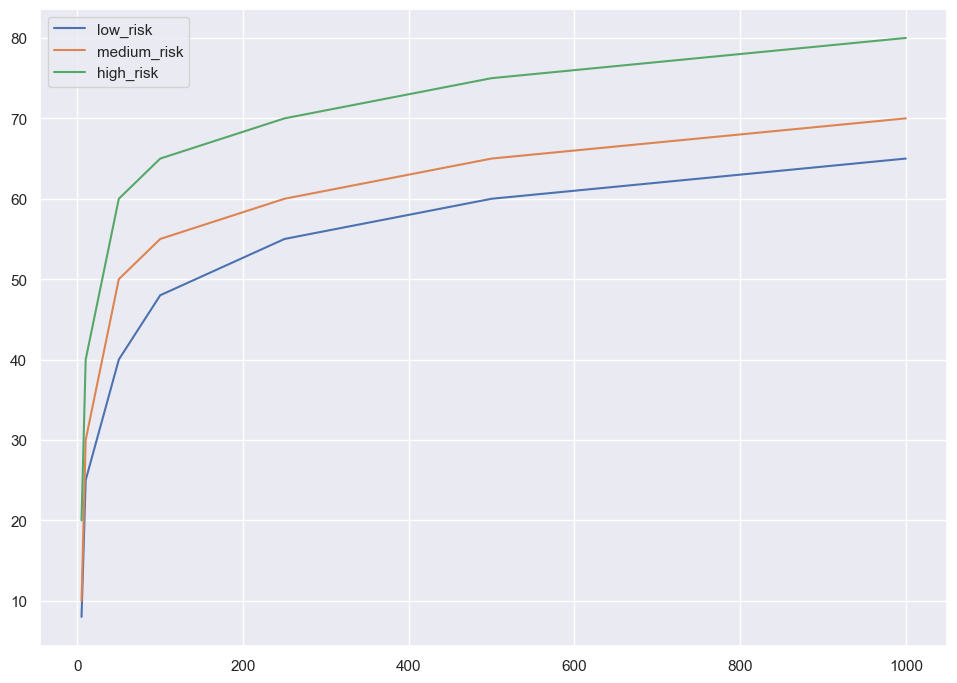

In [1]:
import reXplan as rx
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

simulationName = '1-HV-urban--0-sw'
network = rx.network.Network(simulationName)
simulation = rx.simulation.Sim(simulationName)

for rp in network.returnPeriods.keys():
    sns.lineplot(x=network.returnPeriods[rp].x_data, y=network.returnPeriods[rp].y_data, label=network.returnPeriods[rp].name)

A reference return period must be selected to create the iteration samples. The event intensities will 

In [ ]:
simulation.initialize_model_rp(
                    network = network,
                    ref_return_period = "high_risk",
                    mc_iteration_factor = 2,
                    max_mc_iterations = 1000,
                    cv = 0.1,
                    nStrataSamples = 1000)